In [80]:
import pandas as pd
import numpy as np

In [81]:
df_train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import LearningRateScheduler

In [83]:
raw_data = np.loadtxt("train.csv", skiprows=1, dtype='int', delimiter=',')
x_train, x_dev, y_train, y_dev = train_test_split(raw_data[:,1:], raw_data[:,0], test_size=0.1,random_state=0)

Text(0.5, 1.0, '1')

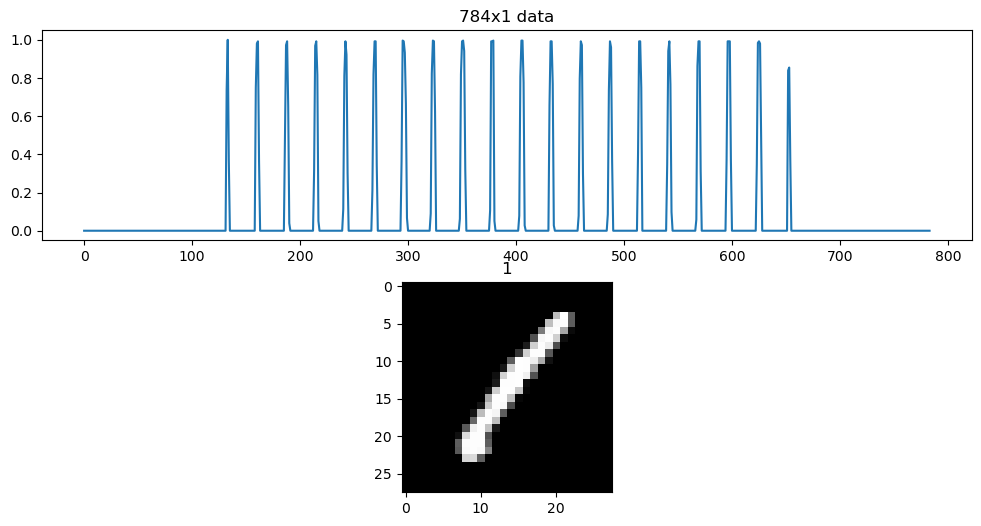

In [84]:
fig, ax = plt.subplots(2, 1, figsize=(12,6))
ax[0].plot(X_train[0])
ax[0].set_title('784x1 data')
ax[1].imshow(X_train[0].reshape(28,28),cmap='gray')
ax[1].set_title(Y_train[0])

In [85]:
x_train = x_train.reshape(-1,28,28,1)
x_dev = x_dev.reshape(-1,28,28,1)
x_train = x_train.astype("float32")/255.0
x_dev = x_dev.astype("float32")/255.0
y_train = to_categorical(y_train)
y_dev = to_categorical(y_dev)

In [87]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5, 5),padding='same', activation='relu',input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (5, 5),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPool2D((2, 2), strides=(2, 2)))

model.add(Conv2D(filters = 64, kernel_size = (3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3, 3),padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(MaxPool2D((2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

annealer = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [88]:
augmented_data_generator = ImageDataGenerator(zoom_range = 0.1,
                            height_shift_range = 0.1,
                            width_shift_range = 0.1,
                            rotation_range = 10)

In [109]:
model.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=1e-2), metrics=["accuracy"])
hist = model.fit(augmented_data_generator.flow(x_train, y_train, batch_size=64),
                           steps_per_epoch=256,
                           epochs=20,
                           verbose=0,  # 0 = silent, 1 = progress bar, 2 = one line per epoch.
                           validation_data=(x_dev, y_dev),
                           callbacks=[annealer])

C:\Users\Fel1off\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [110]:
final_loss, final_acc = model.evaluate(x_dev, y_dev, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0512, final accuracy: 0.9883


In [111]:
y_hat = model.predict(x_dev)
y_pred = np.argmax(y_hat, axis=1)
y_true = np.argmax(y_dev, axis=1)
cm = confusion_matrix(y_true, y_pred)
print(cm)

132/132 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
[[421   0   0   0   0   0   0   0   1   0]
 [  0 470   2   0   1   0   0   0   0   0]
 [  2   0 406   0   0   0   0   0   1   0]
 [  0   0   3 416   0   3   0   3   1   0]
 [  0   0   0   0 413   0   1   2   0  13]
 [  0   0   0   0   0 380   2   0   0   0]
 [  0   0   0   0   0   0 411   0   1   0]
 [  0   1   0   0   0   0   0 468   0   0]
 [  1   0   1   0   0   0   4   0 378   0]
 [  2   1   0   0   2   0   0   0   1 388]]


In [113]:
mnist_testset = np.loadtxt("test.csv", skiprows=1, dtype='int', delimiter=',')
x_test = mnist_testset.astype("float32")
x_test = x_test.reshape(-1, 28, 28, 1)/255.
y_hat = model.predict(x_test, batch_size=64)
y_pred = np.argmax(y_hat,axis=1)
with open("submission.csv", 'w') as f :
    f.write('ImageId,Label\n')
    for i in range(len(y_pred)) :
        f.write("".join([str(i+1),',',str(y_pred[i]),'\n']))

438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step
